# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [68]:
cities

['oistins',
 'outjo',
 'punta arenas',
 'bluff',
 'mataura',
 'borkenes',
 'kibala',
 'okhotsk',
 'busselton',
 'dikson',
 'coquimbo',
 'mahebourg',
 'illoqqortoormiut',
 'hilo',
 'faanui',
 'horqueta',
 'carutapera',
 'hobart',
 'new norfolk',
 'takoradi',
 'yining',
 'dudinka',
 'barrow',
 'san francisco',
 'rindal',
 'avarua',
 'cururupu',
 'shamary',
 'hokitika',
 'grindavik',
 'castro',
 'jamestown',
 'shakhtinsk',
 'barranca',
 'albany',
 'bargal',
 'tuktoyaktuk',
 'dolinsk',
 'saint-joseph',
 'beatrice',
 'kavieng',
 'klaksvik',
 'maragogi',
 'hithadhoo',
 'milak',
 'nikolskoye',
 'east london',
 'rikitea',
 'hasaki',
 'baghdad',
 'ushuaia',
 'butaritari',
 'taburi',
 'lazaro cardenas',
 'porto franco',
 'dubbo',
 'khatanga',
 'yellowknife',
 'maniitsoq',
 'luderitz',
 'vierzon',
 'upernavik',
 'kaitangata',
 'san patricio',
 'cayenne',
 'taolanaro',
 'attawapiskat',
 'ahipara',
 'belushya guba',
 'mar del plata',
 'zhigansk',
 'katsuura',
 'port alfred',
 'ordu',
 'nanakuli',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
#url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key 

url="https://api.openweathermap.org/data/2.5/weather?" +  "appid=" + api_key 


In [70]:
url

'https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e'

In [71]:
response = requests.get(url)
response

<Response [400]>

In [47]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:

   # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Longyearbyen
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=longyearbyen
City not found. Skipping...
Processing Record 2 | Uyuni
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=uyuni
Processing Record 3 | Georgetown
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=georgetown
Processing Record 4 | Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=ushuaia
Processing Record 5 | Mahebourg
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=mahebourg
Processing Record 6 | Hermanus
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=hermanus
Processing Record 7 | Punta Arenas
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=punta arena

Processing Record 61 | Sabang
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=sabang
Processing Record 62 | Trinidad
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=trinidad
City not found. Skipping...
Processing Record 63 | Pochutla
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=pochutla
Processing Record 64 | Ponta do Sol
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=ponta do sol
Processing Record 65 | Masterton
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=masterton
Processing Record 66 | Navahrudak
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=navahrudak
Processing Record 67 | Kahului
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=kahului
Processing Record 68 | Maxixe
https://api.openweatherm

Processing Record 123 | Talnakh
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=talnakh
Processing Record 124 | Lashio
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=lashio
City not found. Skipping...
Processing Record 125 | Balakhninskiy
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=balakhninskiy
Processing Record 126 | Vila Franca do Campo
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=vila franca do campo
Processing Record 127 | Asimion
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=asimion
Processing Record 128 | Murgab
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=murgab
Processing Record 129 | Chuy
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=chuy
Processing Record 130 | Port Said
https:/

Processing Record 184 | Juneau
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=juneau
Processing Record 185 | Saskylakh
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=saskylakh
Processing Record 186 | Mount Isa
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=mount isa
Processing Record 187 | Smestad
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=smestad
City not found. Skipping...
Processing Record 188 | Alofi
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=alofi
Processing Record 189 | Pandan
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=pandan
Processing Record 190 | Nerchinskiy Zavod
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=nerchinskiy zavod
Processing Record 191 | Bonthe
https://api.openwe

Processing Record 245 | Kavieng
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=kavieng
Processing Record 246 | Karangampel
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=karangampel
Processing Record 247 | Sao Felix do Xingu
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=sao felix do xingu
Processing Record 248 | Ulychne
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=ulychne
Processing Record 249 | Port-Cartier
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=port-cartier
Processing Record 250 | Taoudenni
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=taoudenni
Processing Record 251 | Umm Bab
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=umm bab
Processing Record 252 | Cabra
https://api.openweather

Processing Record 305 | Nola
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=nola
Processing Record 306 | Maniitsoq
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=maniitsoq
Processing Record 307 | Fortuna
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=fortuna
Processing Record 308 | Kargil
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=kargil
Processing Record 309 | Myaundzha
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=myaundzha
Processing Record 310 | Narwar
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=narwar
Processing Record 311 | Fare
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=fare
Processing Record 312 | Pahrump
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d

Processing Record 333 | Iskilip
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=iskilip
Processing Record 334 | Copenhagen
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=copenhagen
City not found. Skipping...
Processing Record 335 | Conceicao da Barra
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=conceicao da barra
Processing Record 336 | Enshi
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=enshi
Processing Record 337 | Ponta Delgada
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=ponta delgada
Processing Record 338 | San Ramon
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=san ramon
Processing Record 339 | Prince Rupert
https://api.openweathermap.org/data/2.5/weather?appid=1ce1329e16a828bc86d1573c935ac50e&q=prince rupert
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

# Save data frame to CSV
weather_data.to_csv('weather_data_output.csv')

#Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,90,NO,1555784400,86.0,78.22,15.63,272.150,9.80
1,Uyuni,90,BO,1555785256,18.0,-20.46,-66.82,290.907,4.66
2,Georgetown,75,GY,1555783200,55.0,6.80,-58.16,305.150,6.20
3,Ushuaia,90,AR,1555783200,100.0,-54.81,-68.31,279.150,11.30
4,Mahebourg,75,MU,1555784344,83.0,-20.41,57.70,299.150,5.70


In [56]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,90,NO,1555784400,86.0,78.22,15.63,272.150,9.80
1,Uyuni,90,BO,1555785256,18.0,-20.46,-66.82,290.907,4.66
2,Georgetown,75,GY,1555783200,55.0,6.80,-58.16,305.150,6.20
3,Ushuaia,90,AR,1555783200,100.0,-54.81,-68.31,279.150,11.30
4,Mahebourg,75,MU,1555784344,83.0,-20.41,57.70,299.150,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

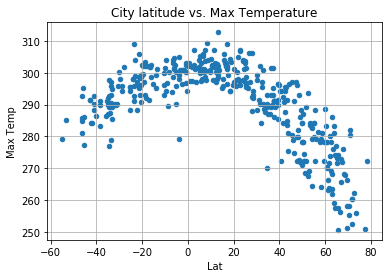

In [55]:
# weather_data['Lat'] = pd.to_numeric(weather_data['Lat'])

weather_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,
              title="City latitude vs. Max Temperature")
plt.show()


#### Latitude vs. Humidity Plot

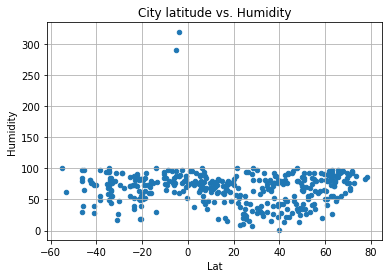

In [51]:
weather_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
              title="City latitude vs. Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

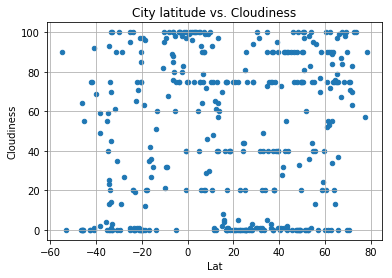

In [52]:
weather_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
              title="City latitude vs. Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

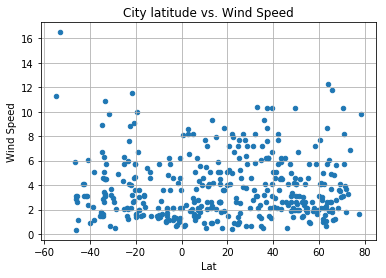

In [53]:
weather_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
              title="City latitude vs. Wind Speed")
plt.show()